# Open Food Facts Exploratory analysis

In [446]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [447]:
data_folder = 'data/'

In [483]:
food = pd.read_csv(data_folder + 'data.csv', sep = '\t', low_memory= False)

There are a lot of NaNs in a dataset:

Text(0.5,1,'Proportion of NaNs of each column')

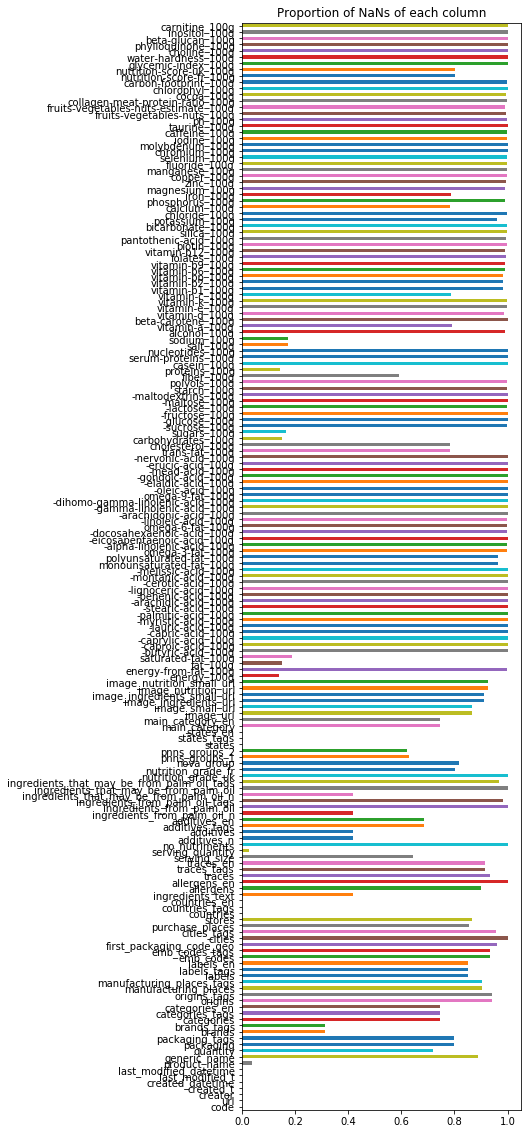

In [111]:
plt.figure(figsize=(5, 20))
food.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs of each column")

### First idea
We are very curious in "Food carbon footprint": greenhouse gas emissions produced by growing, rearing, farming, processing, transporting, storing, cooking and disposing of the food we eat. We are interested in finding out the countries, which are emitting huge amount of carbon in the result of food production and consumption, and identify the ways to reduce it. WE hope the dataset will give us insights about the products and their origins having highest carbon footprint(i.e. meat, cheese,eggs, so on) and the ones having lower carbon footprints(i.e. fruit, vegetables, beans, nuts so on). Additionally we consider that food packaging and food waste treatment have huge proportion of impact on carbon emission, thus these were hypothesis that we were interested to test and make conclusions about global problems.

In [ ]:
# to separat the data where the carbon footprint  column has no missing values
data_with_carbon = food[~food['carbon-footprint_100g'].isnull()]
print('The number of foods containing carbon inforamtion: {} which is the {} % of data'.format(data_with_carbon.shape[0],data_with_carbon.shape[0]/food.shape[0] ))

/Users/mariamhakobyan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


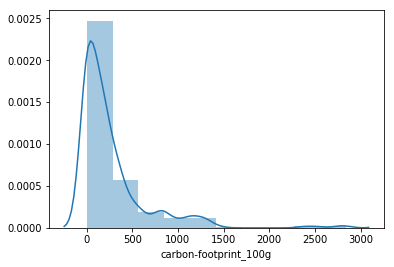

In [104]:
# see its estimated distribution
sns.distplot(data_with_carbon["carbon-footprint_100g"], bins= 10)

In [18]:
# get numeric features
numeric_features = data_with_carbon.describe().columns

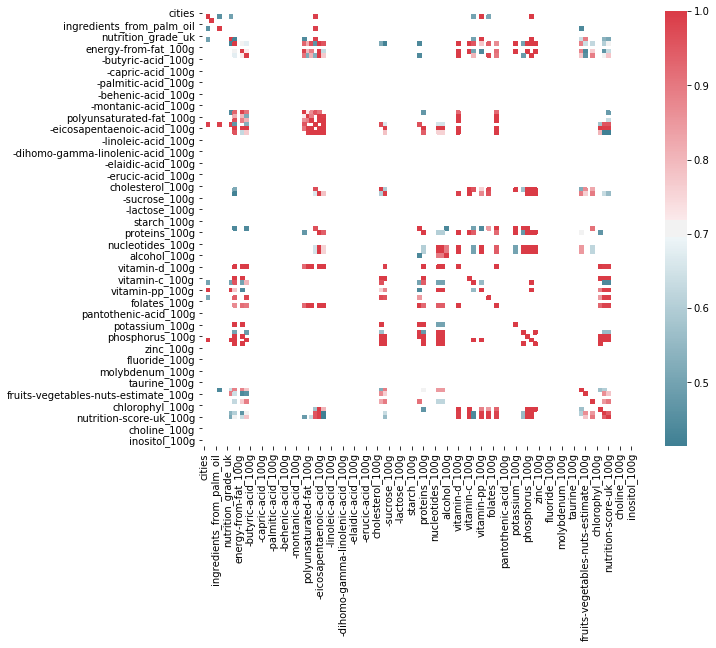

In [118]:
# print the correlation table for the small data with carbon footprint 
f, ax = plt.subplots(figsize=(10, 8))
corr = data_with_carbon[numeric_features].corr().abs()
corr = corr[corr > 0.4]
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [121]:
# get the highest correlated feautres
corr_carbon = corr["carbon-footprint_100g"]
a = corr_carbon[corr_carbon > 0.5] 
print("The highest correlation with carbon-footprint")
a

The highest correlation with carbon-footprint


-alpha-linolenic-acid_100g     0.576160
-eicosapentaenoic-acid_100g    1.000000
-docosahexaenoic-acid_100g     0.804430
vitamin-d_100g                 0.999337
vitamin-c_100g                 1.000000
vitamin-pp_100g                0.885950
vitamin-b9_100g                0.845574
vitamin-b12_100g               0.930463
phosphorus_100g                1.000000
iron_100g                      1.000000
magnesium_100g                 1.000000
fruits-vegetables-nuts_100g    0.570039
carbon-footprint_100g          1.000000
Name: carbon-footprint_100g, dtype: float64

Text(0.5,1,'Proportion of NaNs in each correlated columns with carbon Footprint in the whole dataset')

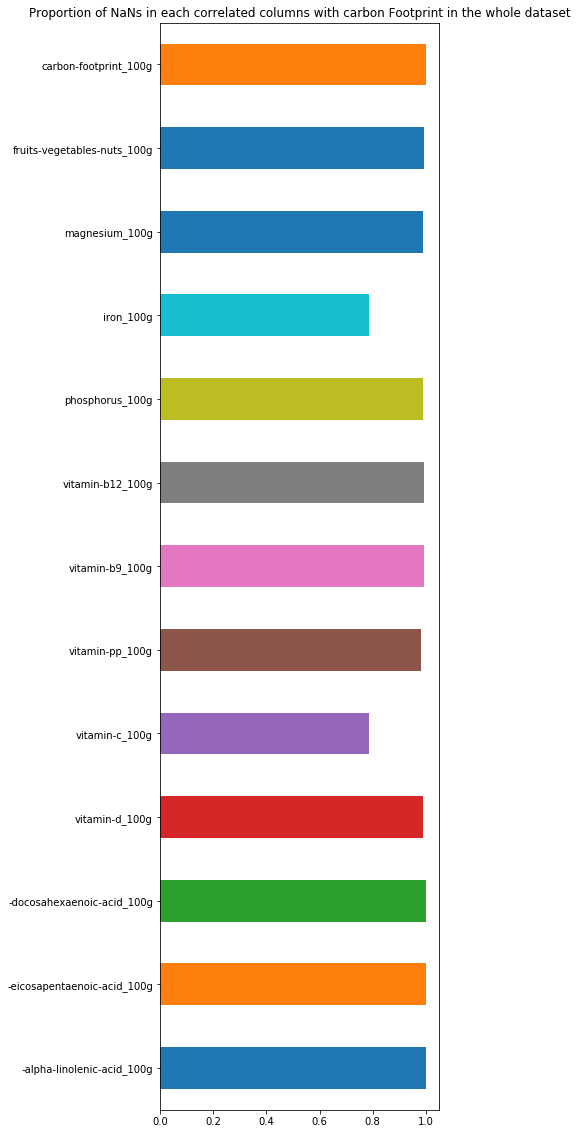

In [107]:
# see the proportion of nulls of the highly correlated features in the whole dataset
plt.figure(figsize=(5, 20))
food[a.index].isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each correlated columns with carbon Footprint in the whole dataset")

In [108]:
# to know how much data we have for each of the correlated feature
for i in a.index:
    print("size of data with full {} column is {}:".format(i,food[~food[i].isnull()].shape))

size of data with full -alpha-linolenic-acid_100g column is (258, 174):
size of data with full -eicosapentaenoic-acid_100g column is (78, 174):
size of data with full -docosahexaenoic-acid_100g column is (133, 174):
size of data with full vitamin-d_100g column is (7644, 174):
size of data with full vitamin-c_100g column is (141581, 174):
size of data with full vitamin-pp_100g column is (12175, 174):
size of data with full vitamin-b9_100g column is (5592, 174):
size of data with full vitamin-b12_100g column is (5766, 174):
size of data with full phosphorus_100g column is (6279, 174):
size of data with full iron_100g column is (141435, 174):
size of data with full magnesium_100g column is (6966, 174):
size of data with full fruits-vegetables-nuts_100g column is (3391, 174):
size of data with full carbon-footprint_100g column is (343, 174):


Text(0.5,1,'Proportion of NaNs in each correlated columns with carbon Footprint in where carbon is not null')

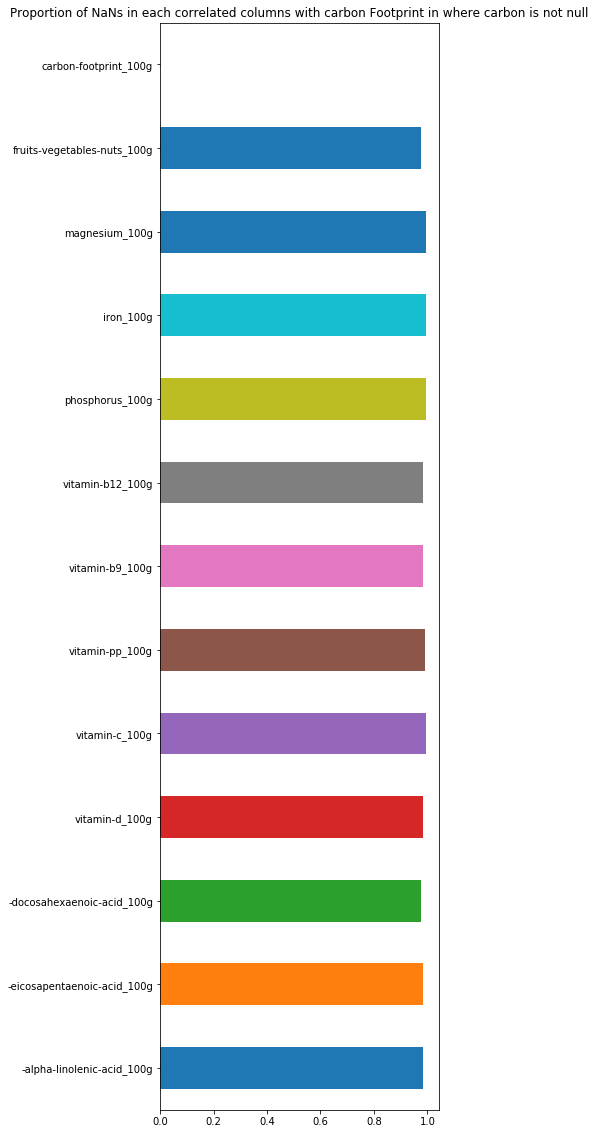

In [109]:
# to see the proportion of nulls of the features in the data_carbon_food_print
plt.figure(figsize=(5, 20))
data_with_carbon[a.index].isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each correlated columns with carbon Footprint in where carbon is not null")

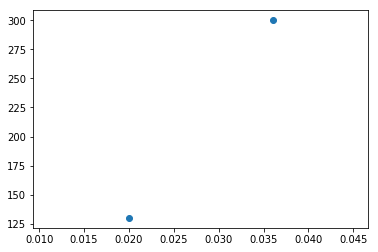

In [110]:
# get the scatter plot of c.f and vitamin-c_100g (vitamin-pp_100g, iron_100g)
plt.scatter(data_with_carbon['vitamin-c_100g'], data_with_carbon['carbon-footprint_100g'])

### Conclusion
Unfortunately the high correlation is because of the lack of datapoints, it has been shown that the proportions of NAN is very high in the dataset where the carbon footprint has some information. So our thoughts that we may apply regression and other fill in tools to fill the carbon footprint values are ruined, we decided to leave this idea because we dont have enough data(and didn't find the carbon footprint of each food product) to make real conculsions. 

### Observation of features  Initial size (665697, 174)

In [449]:
obj_feat = food.select_dtypes('O').columns
numeric_feat = food.select_dtypes('float').columns

In [450]:
obj_feat

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'allergens',
       'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size',
       'serving_quantity', 'no_nutriments', 'additives', 'additives_tags',
       'additives_en', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en',
       'main_catego

In [484]:
# drop the urls
food.drop(['url','image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url'], axis = 1, inplace = True)
obj_feat = food.select_dtypes('O').columns

In [488]:
obj_feat[1:]

Index(['creator', 'created_t', 'created_datetime', 'last_modified_t',
       'last_modified_datetime', 'product_name', 'generic_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'origins', 'origins_tags',
       'manufacturing_places', 'manufacturing_places_tags', 'labels',
       'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags',
       'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores',
       'countries', 'countries_tags', 'countries_en', 'ingredients_text',
       'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en',
       'serving_size', 'serving_quantity', 'no_nutriments', 'additives',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en',
       'main_category', 'main_category_en

In [489]:
#transformation with string to lower case 
for i in obj_feat[1:]:
    food[i] = food[i].str.lower()

##### 'code'

In [490]:
# code should exist and should be unique for each product
food.dropna(subset=['code'],inplace=True)
food.code.describe()

count            665663
unique           665659
top       3700446410957
freq                  2
Name: code, dtype: object

In [491]:
# get the products with duplicated  codes
food[food.code.duplicated(keep = False)]

,code,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
391448,3480580000121,kiliweb,1534144276,2018-08-13t07:11:16z,1537180124,2018-09-17t10:28:44z,arachides sucrees,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391449,3480580000121,kiliweb,1534144276,2018-08-13t07:11:16z,1539357604,2018-10-12t15:20:04z,arachides sucrées,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421916,3596701440535,openfoodfacts-contributors,1537044583,2018-09-15t20:49:43z,1537045183,2018-09-15t20:59:43z,blanc de dinde,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421917,3596701440535,openfoodfacts-contributors,1537044583,2018-09-15t20:49:43z,1537045244,2018-09-15t21:00:44z,blanc de dinde,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441055,3700446410957,openfoodfacts-contributors,1537012708,2018-09-15t11:58:28z,1537174585,2018-09-17t08:56:25z,myrtille bio,NaN,118g,boite plastique dur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441056,3700446410957,openfoodfacts-contributors,1537012708,2018-09-15t11:58:28z,1537174704,2018-09-17t08:58:24z,myrtille bio,NaN,118g,boite plastique dur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559773,6003326008341,beniben,1537967806,2018-09-26t13:16:46z,1537970130,2018-09-26t13:55:30z,pilsener,beer - pilsener,330 ml,"verre,bouteille",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559774,6003326008341,beniben,1537967806,2018-09-26t13:16:46z,1537970162,2018-09-26t13:56:02z,pilsener,beer - pilsener,330 ml,"verre,bouteille",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [492]:
# drop the first accurances as these are done later
food.drop_duplicates(subset=['code'], keep = 'last', inplace=True)

In [493]:
food.code.describe()

count            665659
unique           665659
top       3424150011193
freq                  1
Name: code, dtype: object

In [494]:
# now as it is unique set it as index for the products dataset, because each product has unique code
food.set_index('code', inplace= True)

#### 'creator'

In [495]:
food.creator.unique().shape
# the current data was created by 6354 contributers 

(6354,)

Text(0.5,1,'Top contributers')

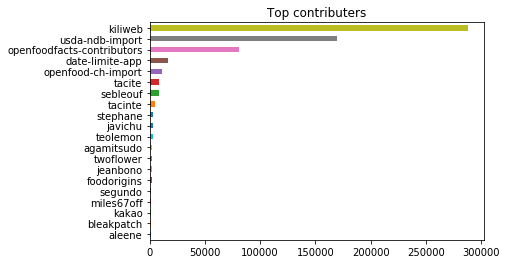

In [496]:
creators = food["creator"].value_counts()
creators[:20][::-1].plot.barh()
plt.title("Top contributers")

###### 'created_t' and 'last_modified_t'

In [497]:
print(food['created_t'].describe())
# we guess this is the creation time so we have another feature for this, hence we drop this column
food.drop(['created_t'], axis=1, inplace=True)

print(food['last_modified_t'].describe())
# we guess this is the modification time so we have another feature for this, hence we drop this column
food.drop(['last_modified_t'], axis=1, inplace=True)

count         665659
unique        531218
top       1489055829
freq              20
Name: created_t, dtype: object
count         665659
unique        518736
top       1439141742
freq              27
Name: last_modified_t, dtype: object


##### 'created_datetime' and 'last_modified_datetime'

In [500]:
print(food['created_datetime'].describe())
food['created_datetime'] = pd.to_datetime(food['created_datetime'], format='%Y-%m-%dt%H:%M:%Sz')
print(food['last_modified_datetime'].describe())
food['last_modified_datetime'] = pd.to_datetime(food['last_modified_datetime'], format='%Y-%m-%dt%H:%M:%Sz')

count                   665658
unique                  531217
top       2017-03-09t10:37:09z
freq                        20
Name: created_datetime, dtype: object
count                   665659
unique                  518736
top       2015-08-09t17:35:42z
freq                        27
Name: last_modified_datetime, dtype: object


#### 'product_name'

In [502]:
food.product_name.describe()
# Ice- cream is the top product  and we have 459355 variaties of product

count     639456
unique    432155
top        comté
freq         424
Name: product_name, dtype: object

In [503]:
pn = food[food.product_name.isna()]
pn.shape

(26203, 164)

Text(0.5,1,'Proportion of NaNs of the features in the data where the product name is not given')

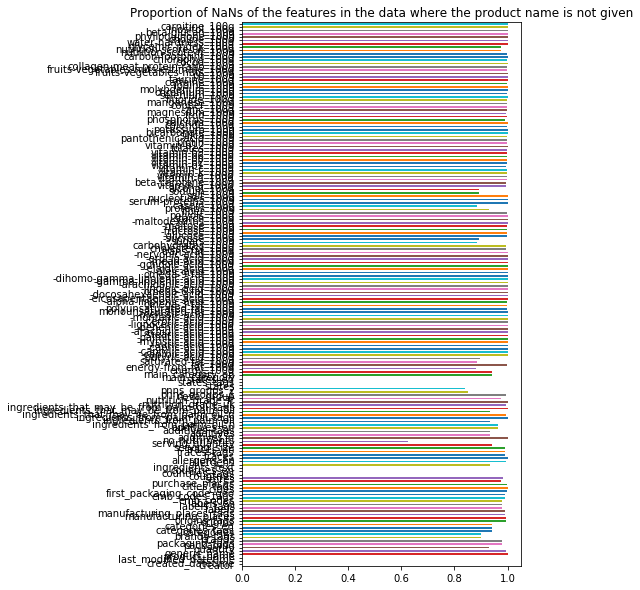

In [504]:
# to see the proportion of nulls of the features in the data where the product name is not given 
plt.figure(figsize=(5, 10))
pn[pn.columns].isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs of the features in the data where the product name is not given")

In [505]:
# products should have names, for us to be easy to make conlcusions, that is why we drop unnamed products
food.dropna(axis=0, subset=['product_name'], inplace= True)

In [506]:
food.product_name.describe()

count     639456
unique    432155
top        comté
freq         424
Name: product_name, dtype: object

Text(0.5,1,'Top products')

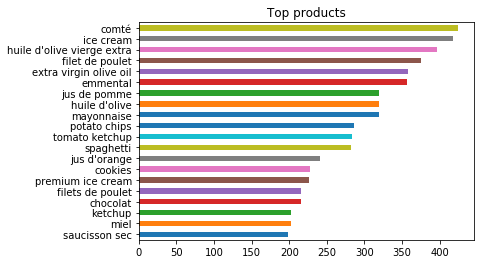

In [507]:
food.product_name = food.product_name.astype(str).str.lower()
pr_name = food["product_name"].value_counts()
pr_name[:20][::-1].plot.barh()
plt.title("Top products")

In [306]:
#names = splitDataFrameList(food, "product_name", " ")

There are some products that can be cosnidered as the same i.e ice-cream, ice cream, name ice cream and so on 

#### 'generic_name'

In [508]:
food.generic_name.describe()

count                                                 74422
unique                                                53496
top       pâtes alimentaires au blé dur de qualité supér...
freq                                                    181
Name: generic_name, dtype: object

In [509]:
food.generic_name.unique()

array([nan, 'blanquette de volaille et son riz', 'laitue en salade', ...,
       'sprot', 'thé bio équitable', 'leba pickle flavor potato chips'],
      dtype=object)

In [510]:
# the generic name is not very helpful for allergens, that is why we drop for now
food.drop('generic_name', axis = 1, inplace = True)

#### 'quantity'

In [511]:
food.quantity.unique()
# change the g, grammes, kg to one unit measure

array([nan, '130 g', '1kg', ..., '948 g', '~300 g', '35grammes'],
      dtype=object)

#### 'packaging'

In [512]:
food.packaging.describe()

count               134034
unique               20417
top       sachet,plastique
freq                  8462
Name: packaging, dtype: object

In [513]:
food['packaging'] = food['packaging'].str.lower()

Text(0.5,1,'Top Packaging materials')

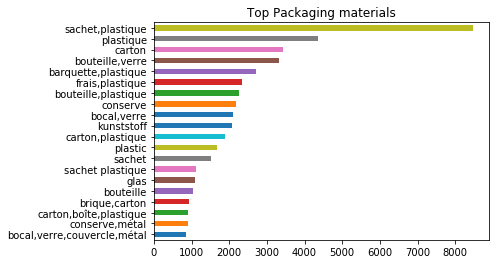

In [514]:
pack = food['packaging'].value_counts()
pack[:20][::-1].plot.barh()
plt.title("Top Packaging materials")

### 'packaging_tags'

In [515]:
food['packaging_tags'].describe()

count               134032
unique               19412
top       sachet,plastique
freq                  8465
Name: packaging_tags, dtype: object

In [516]:
food.drop('packaging_tags', axis = 1, inplace = True)

#### 'brands'

In [517]:
food['brands'].describe()

count        454165
unique        85432
top       carrefour
freq           5568
Name: brands, dtype: object

Text(0.5,1,'Top Brands in the dataset')

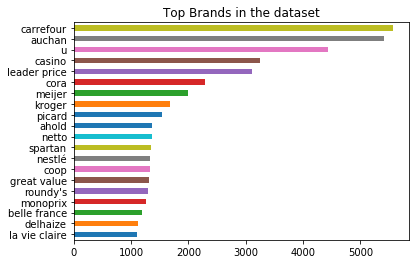

In [518]:
brands = food[~food.brands.isna()].brands.value_counts()
brands[:20][::-1].plot.barh()
plt.title("Top Brands in the dataset")

#### 'brands_tags'

In [520]:
food['brands_tags'].describe()

count        454132
unique        78948
top       carrefour
freq           5631
Name: brands_tags, dtype: object

Text(0.5,1,'Top Brand_tags in the dataset')

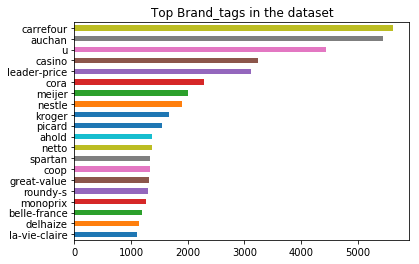

In [521]:
brand_tags = food.brands_tags.value_counts()
brand_tags[:20][::-1].plot.barh()
plt.title("Top Brand_tags in the dataset")

In [523]:
food.drop('brands_tags', axis = 1, inplace= True)

### 'categories' , 'categories_tags', 'categories_en'


count           167501
unique           59633
top       en:beverages
freq              6962
Name: categories, dtype: object


Text(0.5,1,'Top Categories in the dataset')

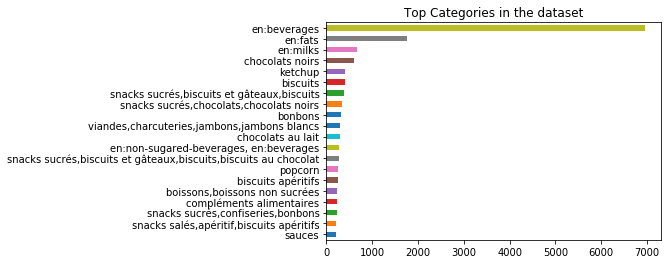

In [527]:
print(food['categories'].describe())
cat = food.categories.value_counts()
cat[:20][::-1].plot.barh()
plt.title("Top Categories in the dataset")

count                                167498
unique                                34666
top       beverages,non-alcoholic beverages
freq                                   5114
Name: categories_en, dtype: object


Text(0.5,1,'Top Categories in the dataset')

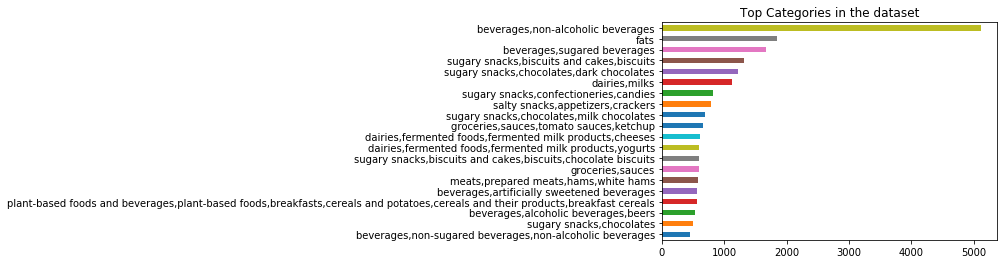

In [528]:
print(food.categories_en.describe())
cat = food.categories_en.value_counts()
cat[:20][::-1].plot.barh()
plt.title("Top Categories in the dataset")

In [529]:
food.drop('categories_tags', axis = 1, inplace = True)

#### 'origins' ,  'origins_tags'

In [530]:
print(food.origins.describe())
print(food.origins_tags.describe())

count      39455
unique      6744
top       france
freq       10822
Name: origins, dtype: object
count      39402
unique      6432
top       france
freq       10825
Name: origins_tags, dtype: object


Text(0.5,1,'Top Origins in the dataset')

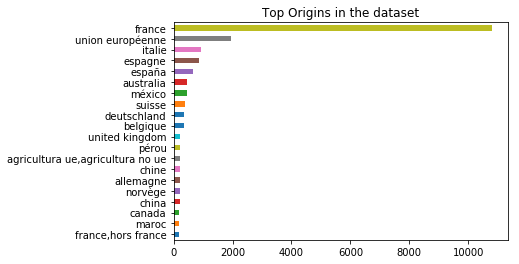

In [531]:
orig = food.origins.value_counts()
orig[:20][::-1].plot.barh()
plt.title("Top Origins in the dataset")

Text(0.5,1,'Top Origins tags in the dataset')

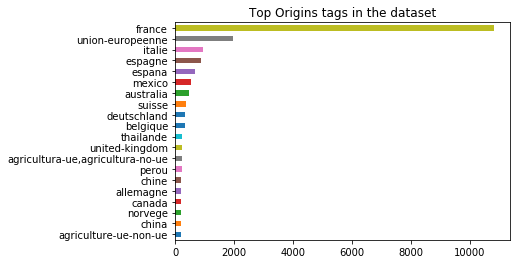

In [532]:
orig = food.origins_tags.value_counts()
orig[:20][::-1].plot.barh()
plt.title("Top Origins tags in the dataset")

In [533]:
food.drop('origins_tags', axis = 1, inplace=True)

#### 'manufacturing_places', 'manufacturing_places_tags'

In [534]:
print(food.manufacturing_places.describe())
print(food.manufacturing_places_tags.describe())

count      63622
unique     11993
top       france
freq       18344
Name: manufacturing_places, dtype: object
count      63603
unique     11353
top       france
freq       18346
Name: manufacturing_places_tags, dtype: object


Text(0.5,1,'Top Manufacturing places in the dataset')

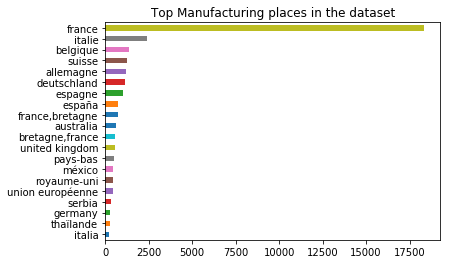

In [535]:
mp = food.manufacturing_places.value_counts()
mp[:20][::-1].plot.barh()
plt.title("Top Manufacturing places in the dataset")

Text(0.5,1,'Top Manufacturing_tags places in the dataset')

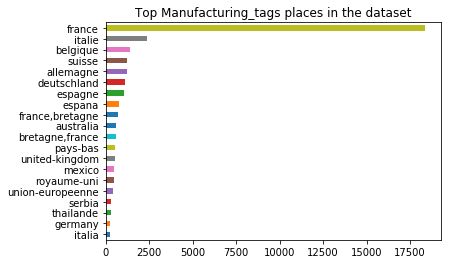

In [536]:
mp = food.manufacturing_places_tags.value_counts()
mp[:20][::-1].plot.barh()
plt.title("Top Manufacturing_tags places in the dataset")

In [537]:
food.drop('manufacturing_places_tags', axis = 1, inplace=True)

#### 'labels' , 'labels_tags'

count          98981
unique         31844
top       en:organic
freq           13695
Name: labels, dtype: object


Text(0.5,1,'Top Labels in the dataset')

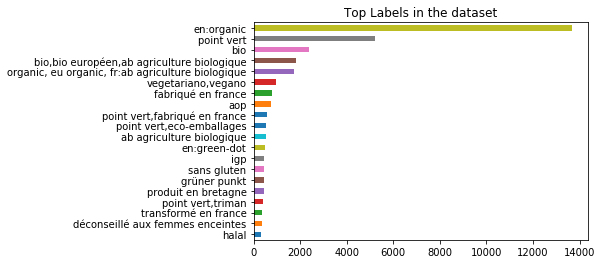

In [538]:
print(food.labels.describe())
labels = food.labels.value_counts()
labels[:20][::-1].plot.barh()
plt.title("Top Labels in the dataset")

In [604]:
food_aller = food[~food.allergens.isna()]

In [610]:
food_aller.labels_tags.unique().shape

(12087,)

count          99041
unique         24354
top       en:organic
freq           16369
Name: labels_tags, dtype: object


Text(0.5,1,'Top Labels Tags in the dataset')

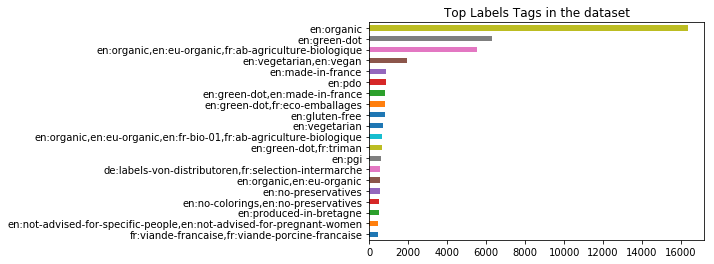

In [540]:
print(food.labels_tags.describe())
labels_tags = food.labels_tags.value_counts()
labels_tags[:20][::-1].plot.barh()
plt.title("Top Labels Tags in the dataset")

count       99041
unique      24354
top       organic
freq        16369
Name: labels_en, dtype: object


Text(0.5,1,'Top Labels English in the dataset')

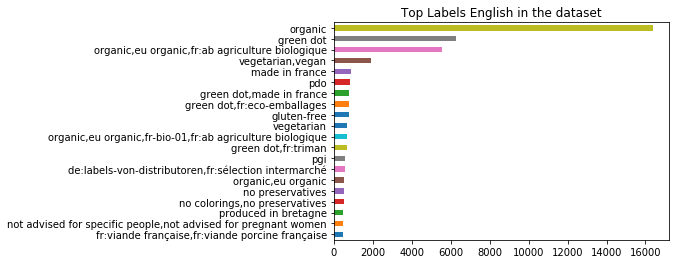

In [542]:
print(food.labels_en.describe())
labels_en = food.labels_en.value_counts()
labels_en[:20][::-1].plot.barh()
plt.title("Top Labels English in the dataset")

#### 'emb_codes', 'emb_codes_tags'

count          42627
unique         11972
top       emb-56251e
freq             255
Name: emb_codes_tags, dtype: object


Text(0.5,1,'Top emb_codes in the dataset')

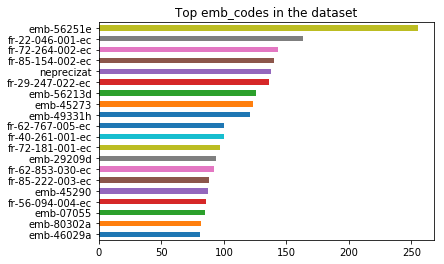

In [544]:
print(food.emb_codes_tags.describe())
emb_codes = food.emb_codes_tags.value_counts()
emb_codes[:20][::-1].plot.barh()
plt.title("Top emb_codes in the dataset")

In [546]:
food.drop(['emb_codes', 'emb_codes_tags'], axis = 1, inplace = True)

#### 'first_packaging_code_geo'

count                   27235
unique                   2078
top       47.633333,-2.666667
freq                      334
Name: first_packaging_code_geo, dtype: object


Text(0.5,1,'Top first_packaging_code_geo in the dataset')

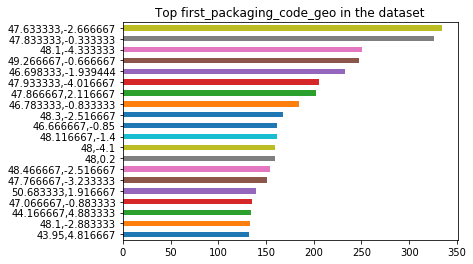

In [547]:
print(food.first_packaging_code_geo.describe())
first_packaging_code_geo = food.first_packaging_code_geo.value_counts()
first_packaging_code_geo[:20][::-1].plot.barh()
plt.title("Top first_packaging_code_geo in the dataset")

In [548]:
food.drop('first_packaging_code_geo', axis = 1, inplace=True)

#### 'cities_tags'

count                     28995
unique                     3279
top       theix-morbihan-france
freq                        320
Name: cities_tags, dtype: object


Text(0.5,1,'Top cities_tags in the dataset')

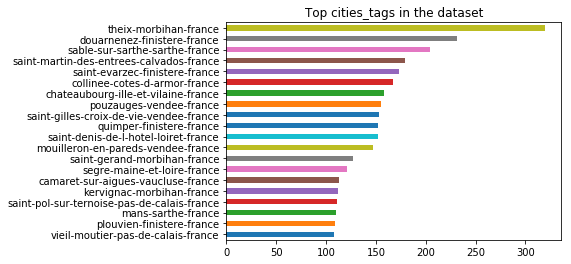

In [550]:
print(food.cities_tags.describe())
cities_tags = food.cities_tags.value_counts()
cities_tags[:20][::-1].plot.barh()
plt.title("Top cities_tags in the dataset")

In [551]:
food.drop('cities_tags', axis = 1, inplace=True)

#### 'purchase_places', 'stores', 'countries' , 'countries_tags', 'countries_en'

count      96008
unique      6975
top       france
freq       30232
Name: purchase_places, dtype: object


Text(0.5,1,'Top purchase_places in the dataset')

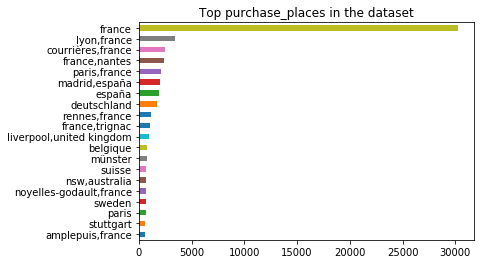

In [552]:
print(food.purchase_places.describe())
purchase_places = food.purchase_places.value_counts()
purchase_places[:20][::-1].plot.barh()
plt.title("Top purchase_places in the dataset")

count          87559
unique          5560
top       magasins u
freq           11772
Name: stores, dtype: object


Text(0.5,1,'Top stores in the dataset')

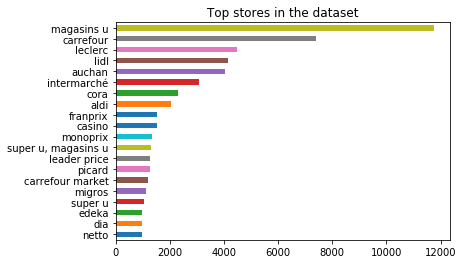

In [553]:
print(food.stores.describe())
stores = food.stores.value_counts()
stores[:20][::-1].plot.barh()
plt.title("Top stores in the dataset")

In [554]:
food.drop('stores', axis = 1, inplace=True)

count        639079
unique         2919
top       en:france
freq         193762
Name: countries, dtype: object


Text(0.5,1,'Top countries in the dataset')

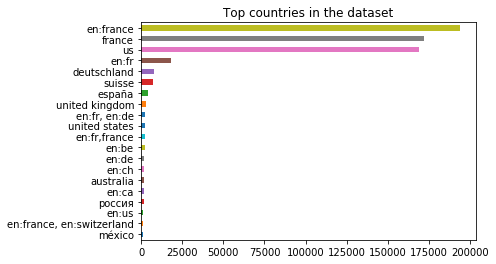

In [555]:
print(food.countries.describe())
countries = food.countries.value_counts()
countries[:20][::-1].plot.barh()
plt.title("Top countries in the dataset")

count        639079
unique         1264
top       en:france
freq         386189
Name: countries_tags, dtype: object


Text(0.5,1,'Top countries_tags in the dataset')

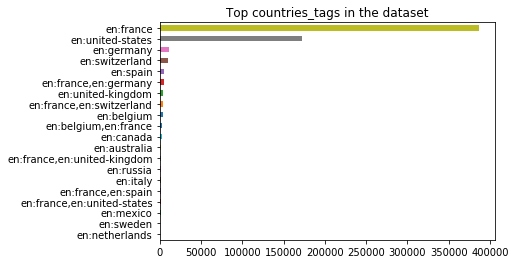

In [556]:
print(food.countries_tags.describe())
countries_tags = food.countries_tags.value_counts()
countries_tags[:20][::-1].plot.barh()
plt.title("Top countries_tags in the dataset")

In [557]:
food.drop('countries_tags', axis = 1, inplace=True)

count     639079
unique      1264
top       france
freq      386189
Name: countries_en, dtype: object


Text(0.5,1,'Top countries_en in the dataset')

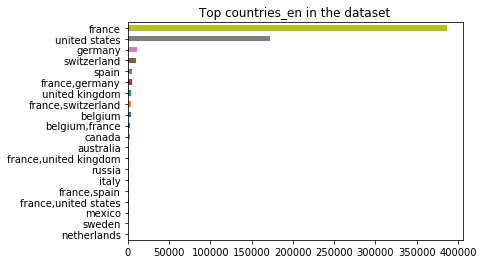

In [558]:
print(food.countries_en.describe())
countries_en = food.countries_en.value_counts()
countries_en[:20][::-1].plot.barh()
plt.title("Top countries_en in the dataset")

#### 'ingredients_text'

count                                386240
unique                               334811
top       carbonated water, natural flavor.
freq                                    224
Name: ingredients_text, dtype: object


Text(0.5,1,'Top ingredients_text in the dataset')

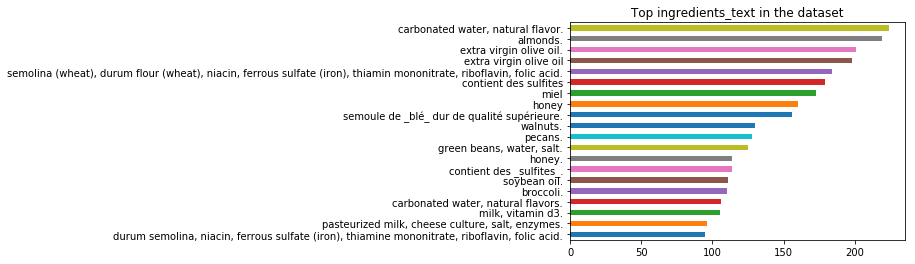

In [559]:
print(food.ingredients_text.describe())
ingredients_text = food.ingredients_text.value_counts()
ingredients_text[:20][::-1].plot.barh()
plt.title("Top ingredients_text in the dataset")

#### 'allergens', 'allergens_en'

count     66333
unique    25055
top        lait
freq       3254
Name: allergens, dtype: object


Text(0.5,1,'Top allergens in the dataset')

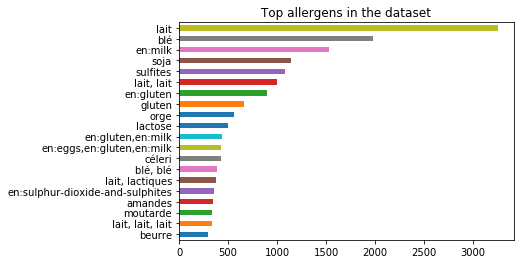

In [560]:
print(food.allergens.describe())
allergens = food.allergens.value_counts()
allergens[:20][::-1].plot.barh()
plt.title("Top allergens in the dataset")

In [564]:
print(food.allergens_en.describe())


count     0
unique    0
Name: allergens_en, dtype: int64


#### 'traces', 'traces_tags', 'traces_en'

count              44843
unique             12826
top       fruits à coque
freq                2518
Name: traces, dtype: object


Text(0.5,1,'Top traces in the dataset')

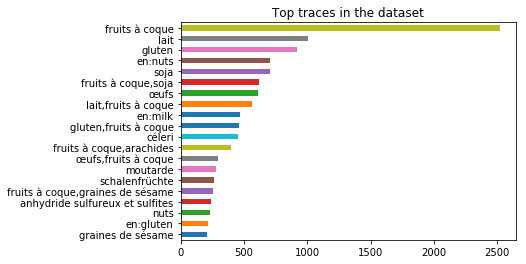

In [565]:
print(food.traces.describe())
traces = food.traces.value_counts()
traces[:20][::-1].plot.barh()
plt.title("Top traces in the dataset")

count       57022
unique       6756
top       en:nuts
freq         5361
Name: traces_tags, dtype: object


Text(0.5,1,'Top traces_tags in the dataset')

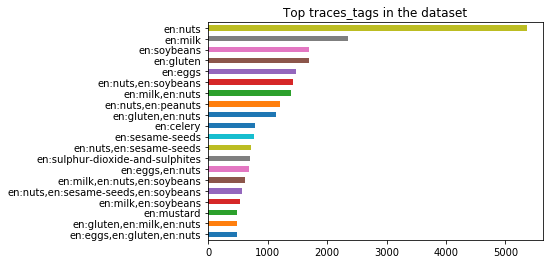

In [566]:
print(food.traces_tags.describe())
traces_tags = food.traces_tags.value_counts()
traces_tags[:20][::-1].plot.barh()
plt.title("Top traces_tags in the dataset")

In [568]:
food.drop('traces_tags', axis = 1, inplace= True)

count     57022
unique     6754
top        nuts
freq       5361
Name: traces_en, dtype: object


Text(0.5,1,'Top traces_en in the dataset')

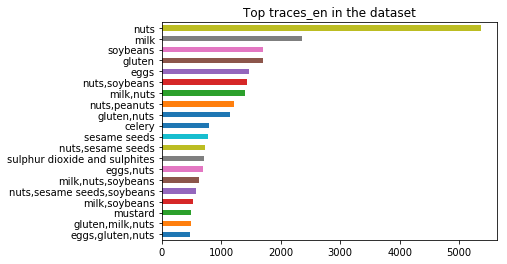

In [567]:
print(food.traces_en.describe())
traces_en = food.traces_en.value_counts()
traces_en[:20][::-1].plot.barh()
plt.title("Top traces_en in the dataset")

#### 'serving_size', 'serving_quantity'

count               235119
unique               26825
top       240 ml (8 fl oz)
freq                  5508
Name: serving_size, dtype: object


Text(0.5,1,'Top serving_size in the dataset')

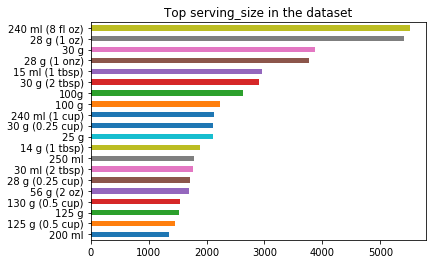

In [569]:
print(food.serving_size.describe())
serving_size = food.serving_size.value_counts()
serving_size[:20][::-1].plot.barh()
plt.title("Top serving_size in the dataset")

count     637350
unique      1619
top            0
freq      412571
Name: serving_quantity, dtype: object


Text(0.5,1,'Top serving_quantity in the dataset')

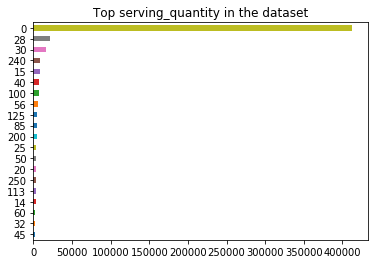

In [570]:
print(food.serving_quantity.describe())
serving_quantity = food.serving_quantity.value_counts()
serving_quantity[:20][::-1].plot.barh()
plt.title("Top serving_quantity in the dataset")

In [573]:
food.serving_quantity = food.serving_quantity.astype('float')

In [581]:
food.serving_quantity.unique()

array([0.000e+00, 2.800e+01, 3.500e+01, ..., 2.200e+04, 2.567e+00,
       5.910e+01])

#### 'no_nutriments'

In [582]:
print(food.no_nutriments.describe())
no_nutriments = food.no_nutriments.value_counts()
no_nutriments[:20][::-1].plot.barh()
plt.title("Top no_nutriments in the dataset")

count     0
unique    0
Name: no_nutriments, dtype: int64


TypeError: Empty 'DataFrame': no numeric data to plot

In [585]:
food.no_nutriments.unique()
food.drop('no_nutriments', axis = 1, inplace = True)

#### 'additives', 'additives_tags', 'additives_en'

count                                                386193
unique                                               322192
top        [ contient-des-sulfites -> fr:contient-des-su...
freq                                                    441
Name: additives, dtype: object


Text(0.5,1,'Top additives in the dataset')

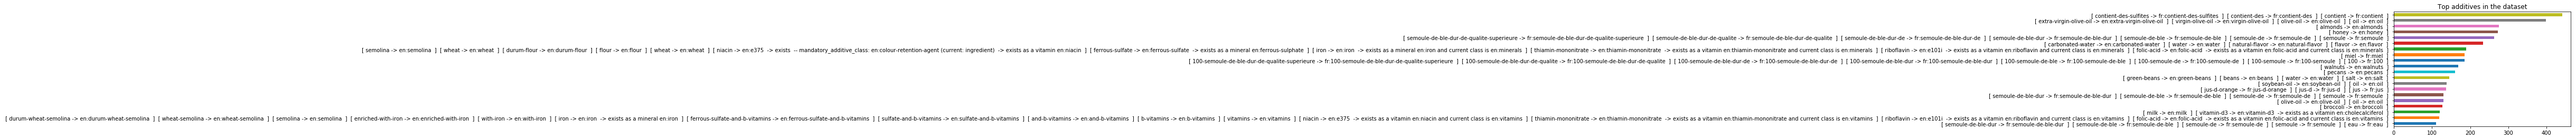

In [611]:
print(food.additives.describe())
additives = food.additives.value_counts()
additives[:20][::-1].plot.barh()
plt.title("Top additives in the dataset")

count      207682
unique      47526
top       en:e330
freq        13969
Name: additives_tags, dtype: object


Text(0.5,1,'Top additives_tags in the dataset')

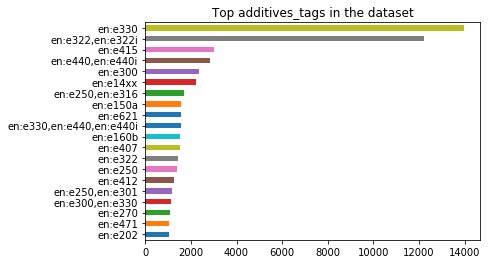

In [587]:
print(food.additives_tags.describe())
additives_tags = food.additives_tags.value_counts()
additives_tags[:20][::-1].plot.barh()
plt.title("Top additives_tags in the dataset")

In [588]:
food.drop('additives_tags', axis = 1, inplace= True)

count                 207682
unique                 47526
top       e330 - citric acid
freq                   13969
Name: additives_en, dtype: object


Text(0.5,1,'Top additives_en in the dataset')

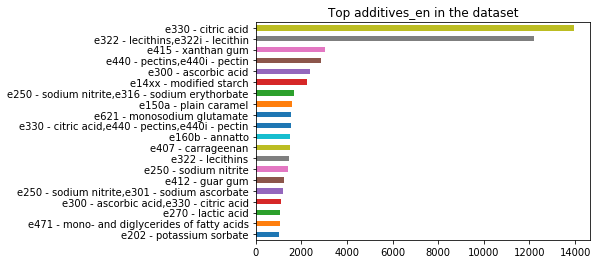

In [612]:
print(food.additives_en.describe())
additives_en = food.additives_en.value_counts()
additives_en[:20][::-1].plot.barh()
plt.title("Top additives_en in the dataset")

#### 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags'

count              11601
unique                15
top       huile-de-palme
freq               11091
Name: ingredients_from_palm_oil_tags, dtype: object


Text(0.5,1,'Top ingredients_from_palm_oil_tags in the dataset')

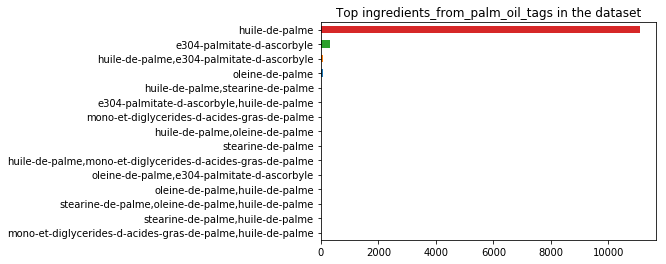

In [590]:
print(food.ingredients_from_palm_oil_tags.describe())
ingredients_from_palm_oil_tags = food.ingredients_from_palm_oil_tags.value_counts()
ingredients_from_palm_oil_tags[:20][::-1].plot.barh()
plt.title("Top ingredients_from_palm_oil_tags in the dataset")

count                                                 22309
unique                                                  258
top       e471-mono-et-diglycerides-d-acides-gras-alimen...
freq                                                   6603
Name: ingredients_that_may_be_from_palm_oil_tags, dtype: object


Text(0.5,1,'Top ingredients_that_may_be_from_palm_oil_tags in the dataset')

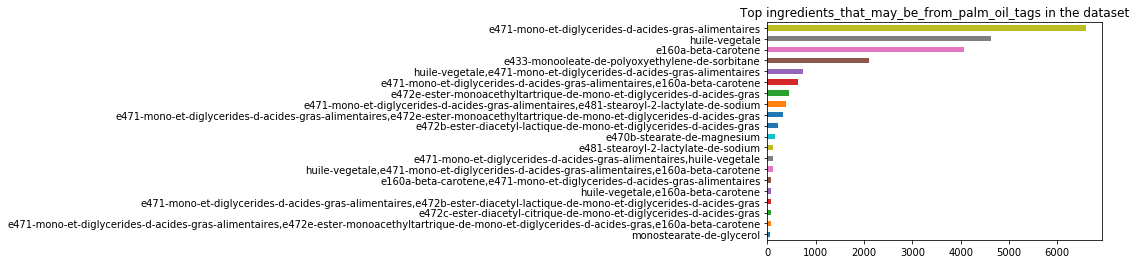

In [591]:
print(food.ingredients_that_may_be_from_palm_oil_tags.describe())
ingredients_that_may_be_from_palm_oil_tags = food.ingredients_that_may_be_from_palm_oil_tags.value_counts()
ingredients_that_may_be_from_palm_oil_tags[:20][::-1].plot.barh()
plt.title("Top ingredients_that_may_be_from_palm_oil_tags in the dataset")

#### 'nutrition_grade_fr'

count     132014
unique         5
top            d
freq       38031
Name: nutrition_grade_fr, dtype: object


Text(0.5,1,'Top nutrition_grade_fr in the dataset')

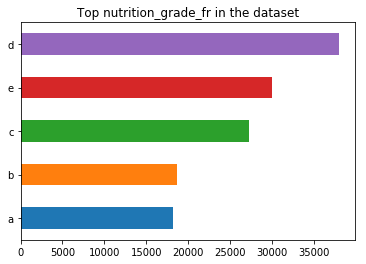

In [592]:
print(food.nutrition_grade_fr.describe())
nutrition_grade_fr = food.nutrition_grade_fr.value_counts()
nutrition_grade_fr[:20][::-1].plot.barh()
plt.title("Top nutrition_grade_fr in the dataset")

#### 'pnns_groups_1', 'pnns_groups_2'

count      243372
unique         14
top       unknown
freq       115720
Name: pnns_groups_1, dtype: object


Text(0.5,1,'Top pnns_groups_1 in the dataset')

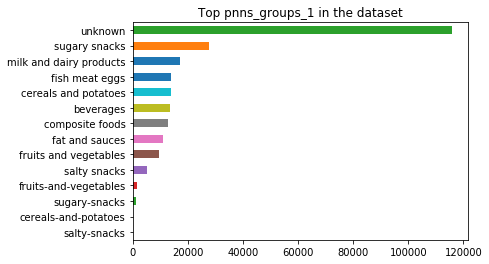

In [593]:
print(food.pnns_groups_1.describe())
pnns_groups_1 = food.pnns_groups_1.value_counts()
pnns_groups_1[:20][::-1].plot.barh()
plt.title("Top pnns_groups_1 in the dataset")

count      248827
unique         37
top       unknown
freq       115720
Name: pnns_groups_2, dtype: object


Text(0.5,1,'Top pnns_groups_2 in the dataset')

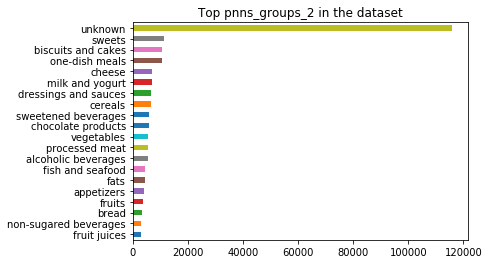

In [594]:
print(food.pnns_groups_2.describe())
pnns_groups_2 = food.pnns_groups_2.value_counts()
pnns_groups_2[:20][::-1].plot.barh()
plt.title("Top pnns_groups_2 in the dataset")

#### 'states', 'states_tags', 'states_en'

count                                                639422
unique                                                  789
top       to be completed,nutrition facts completed,ingr...
freq                                                 166801
Name: states_en, dtype: object


Text(0.5,1,'Top states_en in the dataset')

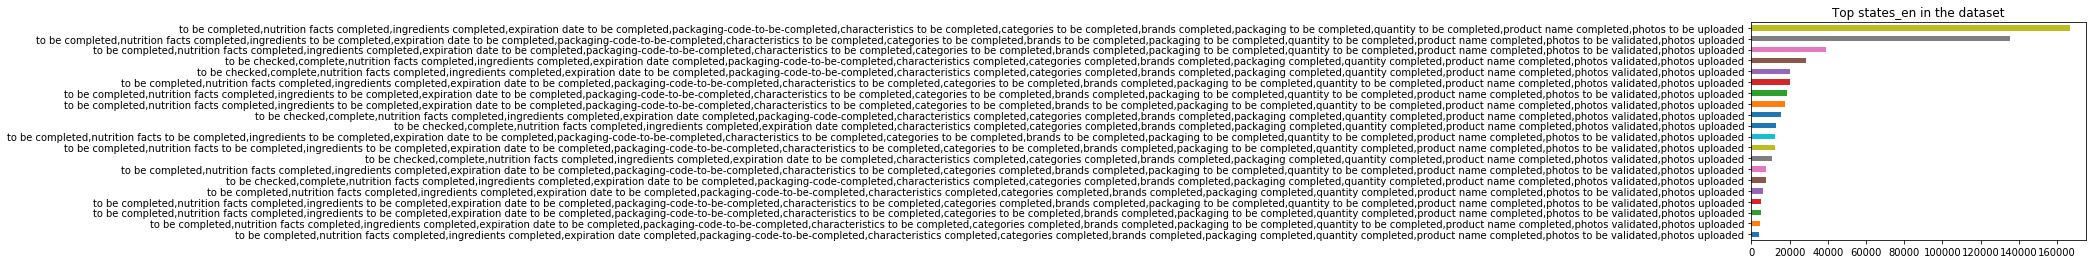

In [597]:
print(food.states_en.describe())
states_en = food.states_en.value_counts()
states_en[:20][::-1].plot.barh()
plt.title("Top states_en in the dataset")

In [598]:
food.drop(['states', 'states_tags', 'states_en'], axis = 1, inplace=True)

####  'main_category', 'main_category_en'

count                                 167444
unique                                  5933
top       en:plant-based-foods-and-beverages
freq                                   36002
Name: main_category, dtype: object


Text(0.5,1,'Top main_category in the dataset')

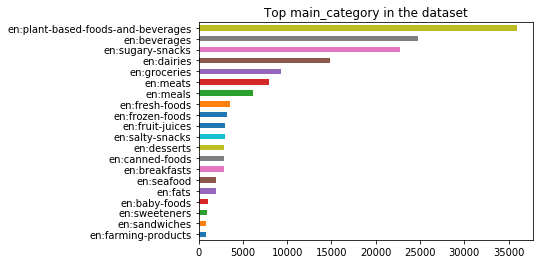

In [599]:
print(food.main_category.describe())
main_category = food.main_category.value_counts()
main_category[:20][::-1].plot.barh()
plt.title("Top main_category in the dataset")

In [601]:
food.drop('main_category', axis = 1, inplace=True)

count                              167444
unique                               5933
top       plant-based foods and beverages
freq                                36002
Name: main_category_en, dtype: object


Text(0.5,1,'Top main_category_en in the dataset')

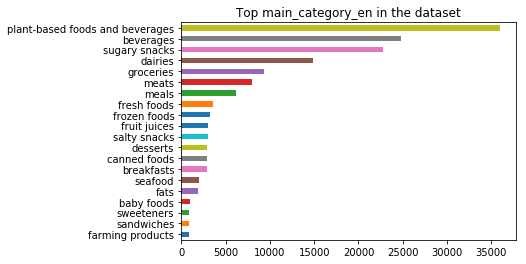

In [600]:
print(food.main_category_en.describe())
main_category_en = food.main_category_en.value_counts()
main_category_en[:20][::-1].plot.barh()
plt.title("Top main_category_en in the dataset")

In [603]:
food.to_csv("cleaned_object_dtype.csv")

### Switch to the second idea
The second idea is "Food allergy", which happens when human body overreact to exposure to particular substances in the food. Our aim in this idea is to link a disease dataset containing information of allowed and not allowed food types of each disease with the food dataset of the ingredients and their proportions. The social goodness of this project is grouping negative and positive affecting food for each type of disease. The novelty of the project will be to identify the 'new' food(not from the already given list) allowance to special groups of people having diseases according to its composition.

In [82]:
# we separated the data where the allergens column has no missing values
data_with_allergens = food[~food['allergens'].isnull()]
print('The number of foods containing allergens inforamtion: {} '.format(data_with_allergens.shape[0]))


The number of foods containing allergens inforamtion: 66512 


In [303]:
def no_null_objects(data, columns=None):
    """
    selects rows with no NaNs
    """
    if columns is None:
        columns = data.columns
    return data[np.logical_not(np.any(data[columns].isnull().values, axis=1))]

There are a lot of text columns representing comma separated list of smth. We need a function to split rows with multiple values to several rows ([source](http://stackoverflow.com/questions/12680754/split-pandas-dataframe-string-entry-to-separate-rows))

In [304]:
def splitDataFrameList(df, target_column, separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split

    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row, row_accumulator, target_column, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

### Allergens in the dataset

In [81]:
food['allergens'].unique()

array([nan, 'OEUF, MOUTARDE, MOUTARDE',
       'BLÉ, GLUTEN, BLE, FROMAGE, LAIT, LAIT, LAIT, LACTIQUES', ...,
       'MILK, MILK, BUTTER, MILK',
       'blé, œufs, cacahuètes, arachides, beurre, noix de cajou, noix de pécan, biscuit spéculoos',
       'amandes, soja, lait, orge'], dtype=object)

In [84]:
food_allergens = splitDataFrameList(no_null_objects(food, ["allergens"]), "allergens", ",")
allergens = food_allergens["allergens"].value_counts()

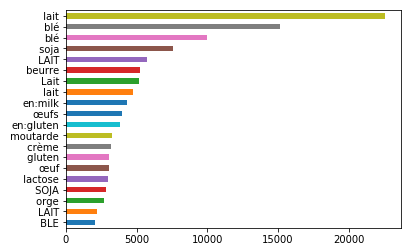

In [85]:
allergens[:20][::-1].plot.barh()

In [86]:
print(allergens[20:].index)
print("Max count:", allergens[20:].max())

Index([' BLÉ', 'en:eggs', 'soja', ' GLUTEN', ' oeufs', ' lactosérum',
       'en:soybeans', ' noisettes', ' BEURRE', ' céleri',
       ...
       ' blé tendre', 'proteină vegetală de soia', ' JOGHURT', ' Tejzsír',
       'suffite', ' lécithine', 'fr:Elimine le calcium',
       ' Hühnertrockeneiweiß', 'Pasteurized Sweet Cream', ' Schaffrischkäse'],
      dtype='object', length=5756)
Max count: 1887


## Summary
* 